In [67]:
%matplotlib inline
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.fftpack
import scipy.stats
import scipy.signal

file_path = r'D:\Stations_data\Bansathi\Bansathi_all_months_copy'
os.chdir(file_path)

In [68]:
df1 = pd.read_csv('Bansathi_all.csv', sep = ',') #arse_dates = 'date')

df1['date'] = pd.to_datetime(df1.date, format = '%d.%m.%Y %H:%M:%S')
df1.set_index('date', inplace = True)
df1_1hr = df1.resample('60min').mean()
df1_1day = df1.resample('1440min').mean()

df2 = pd.read_csv('Rainfall_data_new.csv', sep = ',')
df2['Date & Time'] = pd.to_datetime(df2['Date & Time'])#, format = "%d/%m/%Y - %H:%M:%S")
df2 = df2.set_index('Date & Time')
df2_1hr = df2.resample('60min').mean()
df2_1hr = df2_1hr.fillna(0.0)
df2_1hr.shape


df3 = pd.read_csv('Temp_Rain_Bansathi.csv', sep = ',')
df3['Date & Time'] = pd.to_datetime(df3['Date & Time'], format = "%d/%m/%Y - %H:%M:%S")
df3 = df3.set_index('Date & Time')
df3_1hr = df3.resample('60min').mean()

In [69]:
# # Pre-Monsoon
# date_mask1 = (df1_1hr.index >= '2020-04-11') & (df1_1hr.index < '2020-04-17')
# date_mask2 = (df2_1hr.index >= '2020-04-11') & (df2_1hr.index < '2020-04-17')
# date_mask3 = (df3_1hr.index >= '2020-04-11') & (df3_1hr.index < '2020-04-17')

# # Monsoon
# date_mask1 = (df1_1hr.index >= '2020-06-17') & (df1_1hr.index < '2020-06-24')
# date_mask2 = (df2_1hr.index >= '2020-06-17') & (df2_1hr.index < '2020-06-24')
# date_mask3 = (df3_1hr.index >= '2020-06-17') & (df3_1hr.index < '2020-06-24')

# # Post-Monsoon
# date_mask1 = (df1_1hr.index >= '2020-09-25') & (df1_1hr.index < '2020-10-01')
# date_mask2 = (df2_1hr.index >= '2020-09-25') & (df2_1hr.index < '2020-10-01')
# date_mask3 = (df3_1hr.index >= '2020-09-25') & (df3_1hr.index < '2020-10-01')

# Winter
date_mask1 = (df1_1hr.index >= '2020-12-24') & (df1_1hr.index < '2020-12-30')
date_mask2 = (df2_1hr.index >= '2020-12-24') & (df2_1hr.index < '2020-12-30')
date_mask3 = (df3_1hr.index >= '2020-12-24') & (df3_1hr.index < '2020-12-30')

In [70]:
dfs = [df1_1hr, df2_1hr, df3_1hr]

# Extracting the desired slice of Time-Series (Soil-Moisture)
SM_sensor1 = df1_1hr['S1SM'].loc[date_mask1]
SM_sensor2 = df1_1hr['S2SM'].loc[date_mask1]
SM_sensor3 = df1_1hr['S3SM'].loc[date_mask1]
SM_sensor4 = df1_1hr['S4SM'].loc[date_mask1]
SM_sensor5 = df1_1hr['S5SM'].loc[date_mask1]
SM_sensor6 = df1_1hr['S6SM'].loc[date_mask1]
SM_sensor7 = df1_1hr['S7SM'].loc[date_mask1]
SM_sensor8 = df1_1hr['S8SM'].loc[date_mask1]
SM_sensor9 = df1_1hr['S9SM'].loc[date_mask1]
SM_sensor10 = df1_1hr['S10SM'].loc[date_mask1]

# Extracting the desired slice of Time-Series (Soil-Temperature)
ST_sensor1 = df1_1hr['S1Temp'].loc[date_mask1]
ST_sensor2 = df1_1hr['S2Temp'].loc[date_mask1]
ST_sensor3 = df1_1hr['S3Temp'].loc[date_mask1]
ST_sensor4 = df1_1hr['S4Temp'].loc[date_mask1]
ST_sensor5 = df1_1hr['S5Temp'].loc[date_mask1]
ST_sensor6 = df1_1hr['S6Temp'].loc[date_mask1]
ST_sensor7 = df1_1hr['S7Temp'].loc[date_mask1]
ST_sensor8 = df1_1hr['S8Temp'].loc[date_mask1]
ST_sensor9 = df1_1hr['S9Temp'].loc[date_mask1]
ST_sensor10 = df1_1hr['S10Temp'].loc[date_mask1]

# Extracting the desired slice of Time-Series (Rain-Fall)
Rainfall = df2_1hr['Int_Rainfall (mm)'].loc[date_mask2]

# Extracting the desired slice of Time-Series (Air-Temperature)
Air_Temp = df3_1hr['Temp (0C)'].loc[date_mask3]

In [71]:
SM_sensor1 = SM_sensor1.interpolate(method= 'quadratic')
SM_sensor2 = SM_sensor2.interpolate(method= 'quadratic')
SM_sensor3 = SM_sensor3.interpolate(method= 'quadratic')
SM_sensor4 = SM_sensor4.interpolate(method= 'quadratic')
SM_sensor5 = SM_sensor5.interpolate(method= 'quadratic')
SM_sensor6 = SM_sensor6.interpolate(method= 'quadratic')
SM_sensor7 = SM_sensor7.interpolate(method= 'quadratic')
SM_sensor8 = SM_sensor8.interpolate(method= 'quadratic')
SM_sensor9 = SM_sensor9.interpolate(method= 'quadratic')
SM_sensor10 = SM_sensor10.interpolate(method= 'quadratic')

ST_sensor1 = ST_sensor1.interpolate(method= 'quadratic')
ST_sensor2 = ST_sensor2.interpolate(method= 'quadratic')
ST_sensor3 = ST_sensor3.interpolate(method= 'quadratic')
ST_sensor4 = ST_sensor4.interpolate(method= 'quadratic')
ST_sensor5 = ST_sensor5.interpolate(method= 'quadratic')
ST_sensor6 = ST_sensor6.interpolate(method= 'quadratic')
ST_sensor7 = ST_sensor7.interpolate(method= 'quadratic')
ST_sensor8 = ST_sensor8.interpolate(method= 'quadratic')
ST_sensor9 = ST_sensor9.interpolate(method= 'quadratic')
ST_sensor10 = ST_sensor10.interpolate(method= 'quadratic')

Air_Temp = Air_Temp.interpolate(method= 'quadratic')

In [72]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

print('############ Air Temp. ############')
AT_1 = Air_Temp.values
result_AT = adfuller(AT_1)
print('ADF Statistics: %f' % result_AT[0])
print('p-value: %f' % result_AT[1])
print('Critical Values:')
for key, value in result_AT[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_AT[0] < result_AT[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")

############ Air Temp. ############
ADF Statistics: -7.677002
p-value: 0.000000
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Reject Ho - Time Series is Stationary


In [73]:
# Null - Hypothesis test for Sensor-1 Soil Moisture
print('-#-#-#-#-#-#-#-#-#-# { Soil Temperature} #-#-#-#-#-#-#-#-#-#-')
print('############ Sensor - 1 ############')
S1_ST = ST_sensor1.values
result_S1_ST = adfuller(S1_ST)
print('ADF Statistics: %f' % result_S1_ST[0])
print('p-value: %f' % result_S1_ST[1])
print('Critical Values:')
for key, value in result_S1_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S1_ST[0] < result_S1_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
    
# Null - Hypothesis test for Sensor-5 Soil Moisture
print('############ Sensor - 5 ############')
S5_ST = ST_sensor5.values
result_S5_ST = adfuller(S5_ST)
print('ADF Statistics: %f' % result_S5_ST[0])
print('p-value: %f' % result_S5_ST[1])
print('Critical Values:')
for key, value in result_S5_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S5_ST[0] < result_S5_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-6 Soil Moisture
print('############ Sensor - 6 ############')
S6_ST = ST_sensor6.values
result_S6_ST = adfuller(S6_ST)
print('ADF Statistics: %f' % result_S6_ST[0])
print('p-value: %f' % result_S6_ST[1])
print('Critical Values:')
for key, value in result_S6_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S6_ST[0] < result_S6_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-7 Soil Moisture
print('############ Sensor - 7 ############')
S7_ST = ST_sensor7.values
result_S7_ST = adfuller(S7_ST)
print('ADF Statistics: %f' % result_S7_ST[0])
print('p-value: %f' % result_S7_ST[1])
print('Critical Values:')
for key, value in result_S7_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S7_ST[0] < result_S7_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-8 Soil Moisture
print('############ Sensor - 8 ############')
S8_ST = ST_sensor8.values
result_S8_ST = adfuller(S8_ST)
print('ADF Statistics: %f' % result_S8_ST[0])
print('p-value: %f' % result_S8_ST[1])
print('Critical Values:')
for key, value in result_S8_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S8_ST[0] < result_S8_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-9 Soil Moisture
print('############ Sensor - 9 ############')
S9_ST = ST_sensor9.values
result_S9_ST = adfuller(S9_ST)
print('ADF Statistics: %f' % result_S9_ST[0])
print('p-value: %f' % result_S9_ST[1])
print('Critical Values:')
for key, value in result_S9_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S9_ST[0] < result_S9_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")

-#-#-#-#-#-#-#-#-#-# { Soil Temperature} #-#-#-#-#-#-#-#-#-#-
############ Sensor - 1 ############
ADF Statistics: -1.610334
p-value: 0.477800
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Failed to Reject Ho - Time Series is Non-Stationary
############ Sensor - 5 ############
ADF Statistics: -5.330796
p-value: 0.000005
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578
Reject Ho - Time Series is Stationary
############ Sensor - 6 ############
ADF Statistics: -6.730253
p-value: 0.000000
Critical Values:
	1%: -3.478
	5%: -2.883
	10%: -2.578
Reject Ho - Time Series is Stationary
############ Sensor - 7 ############
ADF Statistics: -5.582037
p-value: 0.000001
Critical Values:
	1%: -3.478
	5%: -2.882
	10%: -2.578
Reject Ho - Time Series is Stationary
############ Sensor - 8 ############
ADF Statistics: -1.409602
p-value: 0.577664
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Failed to Reject Ho - Time Series is Non-Stationary
############ Sensor - 9 ############
ADF Stat

In [74]:
## Stationarity check after first order differencing

############ Air Temp ############
ADF Statistics: -10.105081
p-value: 0.000000
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579
Reject Ho - Time Series is Stationary


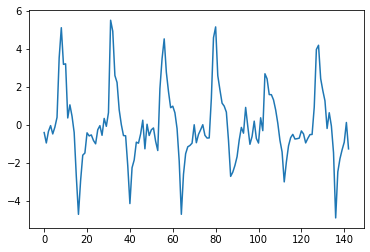

In [75]:
# Differencing to make the Non-stationary time-series into stationaty

# def differncing ():
#     for i in 
print('############ Air Temp ############')
AT_Diff = np.diff(Air_Temp)
result_AT_2 = adfuller(AT_Diff)
print('ADF Statistics: %f' % result_AT_2[0])
print('p-value: %f' % result_AT_2[1])
print('Critical Values:')
for key, value in result_AT_2[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_AT_2[0] < result_AT_2[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
plt.plot(AT_Diff);

In [76]:
# # Differencing to make the Non-stationary time-series into stationaty

# # def differncing ():
# #     for i in 
# print('-#-#-#-#-#-#-#-#-#-# { Soil Temperature} #-#-#-#-#-#-#-#-#-#-')
print('############ Sensor - 1 ############')
S1_ST_Diff = np.diff(ST_sensor1)
len(S1_ST_Diff)

result_S1_ST = adfuller(S1_ST_Diff)
print('ADF Statistics: %f' % result_S1_ST[0])
print('p-value: %f' % result_S1_ST[1])
print('Critical Values:')
for key, value in result_S1_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S1_ST[0] < result_S1_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 5 ############')
S5_ST_Diff = np.diff(ST_sensor5)
len(S5_ST_Diff)

result_S5_ST = adfuller(S5_ST_Diff)
print('ADF Statistics: %f' % result_S5_ST[0])
print('p-value: %f' % result_S5_ST[1])
print('Critical Values:')
for key, value in result_S5_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S5_ST[0] < result_S5_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 6 ############')
S6_ST_Diff = np.diff(ST_sensor6)
len(S6_ST_Diff)

result_S6_ST = adfuller(S6_ST_Diff)
print('ADF Statistics: %f' % result_S6_ST[0])
print('p-value: %f' % result_S6_ST[1])
print('Critical Values:')
for key, value in result_S6_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S6_ST[0] < result_S6_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 7 ############')
S7_ST_Diff = np.diff(ST_sensor7)
len(S7_ST_Diff)

result_S7_ST = adfuller(S7_ST_Diff)
print('ADF Statistics: %f' % result_S7_ST[0])
print('p-value: %f' % result_S7_ST[1])
print('Critical Values:')
for key, value in result_S7_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S7_ST[0] < result_S7_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 8 ############')
S8_ST_Diff = np.diff(ST_sensor8)
len(S8_ST_Diff)

result_S8_ST = adfuller(S8_ST_Diff)
print('ADF Statistics: %f' % result_S8_ST[0])
print('p-value: %f' % result_S8_ST[1])
print('Critical Values:')
for key, value in result_S8_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S8_ST[0] < result_S8_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 9 ############')
S9_ST_Diff = np.diff(ST_sensor9)
len(S9_ST_Diff)

result_S9_ST = adfuller(S9_ST_Diff)
print('ADF Statistics: %f' % result_S9_ST[0])
print('p-value: %f' % result_S9_ST[1])
print('Critical Values:')
for key, value in result_S9_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S9_ST[0] < result_S9_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
###############

############ Sensor - 1 ############
ADF Statistics: -8.382863
p-value: 0.000000
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579
Reject Ho - Time Series is Stationary
############ Sensor - 5 ############
ADF Statistics: -6.880714
p-value: 0.000000
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579
Reject Ho - Time Series is Stationary
############ Sensor - 6 ############
ADF Statistics: -6.933290
p-value: 0.000000
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579
Reject Ho - Time Series is Stationary
############ Sensor - 7 ############
ADF Statistics: -6.855401
p-value: 0.000000
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579
Reject Ho - Time Series is Stationary
############ Sensor - 8 ############
ADF Statistics: -8.015877
p-value: 0.000000
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Reject Ho - Time Series is Stationary
############ Sensor - 9 ############
ADF Statistics: -7.177216
p-value: 0.000000
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [77]:
AT_d1 = pd.Series(AT_Diff)


S1_d2 = pd.Series(S1_ST_Diff)
S5_d2 = pd.Series(S5_ST_Diff)
S6_d2 = pd.Series(S6_ST_Diff)
S7_d2 = pd.Series(S7_ST_Diff)
S8_d2 = pd.Series(S8_ST_Diff)
S9_d2 = pd.Series(S9_ST_Diff)

S1_correlation = scipy.stats.pearsonr(AT_d1, S1_d2)
S5_correlation = scipy.stats.pearsonr(AT_d1, S5_d2)
S6_correlation = scipy.stats.pearsonr(AT_d1, S6_d2)
S7_correlation = scipy.stats.pearsonr(AT_d1, S7_d2)
S8_correlation = scipy.stats.pearsonr(AT_d1, S8_d2)
S9_correlation = scipy.stats.pearsonr(AT_d1, S9_d2)

print(S1_correlation)
print(S5_correlation)
print(S6_correlation)
print(S7_correlation)
print(S8_correlation)
print(S9_correlation)

(0.4133307577844921, 2.8874007891612214e-07)
(-0.18778306942699852, 0.024712430070676642)
(0.17166092999430452, 0.04036514700787834)
(0.32700775655926784, 6.711605897368893e-05)
(-0.3446512703922526, 2.496193401912397e-05)
(-0.05335665895721477, 0.5267963575934914)


In [83]:
S1_corr = scipy.stats.pearsonr(Air_Temp, ST_sensor9)
print(S1_corr)


(0.02527809082251127, 0.7636116627666383)


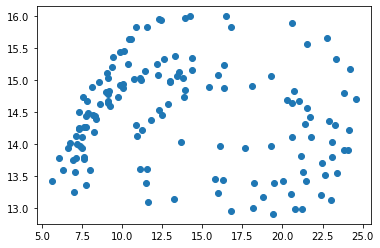

In [79]:
plt.scatter(Air_Temp, ST_sensor5);

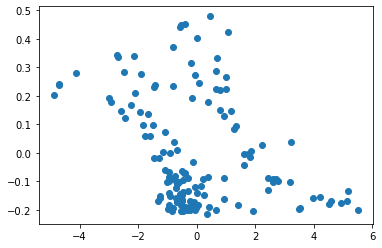

In [80]:
plt.scatter(AT_d1, S8_d2);